<a href="https://colab.research.google.com/github/osamazafar980/Handwriting-Digits-Prediction-Naive-Bayes/blob/master/Naive_Bayes_And_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

# Preparing Dataset


float64 object
(70000, 784) (70000,)


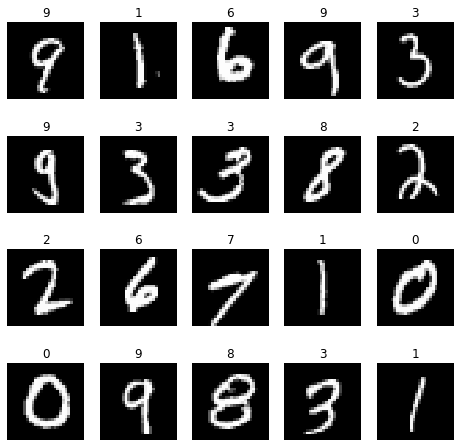

In [2]:
mnist = fetch_openml('mnist_784', version=1)
x = mnist['data']
y = mnist['target']
print(x.dtype, y.dtype)
print(x.shape,y.shape)

#Ploting Data

def plot_images(images , labels):
  n_cols = min(5,len(images))
  n_rows = len(images)//n_cols
  fig = plt.figure(figsize=(8,8))

  for i  in range (n_rows * n_cols):
    sp = fig.add_subplot(n_rows,n_cols,i+1)
    plt.axis("off")
    plt.imshow(images[i], cmap=plt.cm.gray)
    sp.set_title(labels[i])
  plt.show()

p = np.random.permutation(len(x))
p = p[:20]
plot_images(x[p].reshape(-1,28,28),y[p])



In [15]:
y=y.astype("int32")
x = x/255.0
from sklearn.model_selection import train_test_split
tx,tesx,ty,tesy = train_test_split(x,y, test_size=0.15)
print("Training Data Shape : ",tx.shape,"\nTesting Data Shape : ",tesx.shape)

Training Data Shape :  (59500, 784) 
Testing Data Shape :  (10500, 784)




Training Naive Bayes Classifier Model

In [26]:
from sklearn.naive_bayes import BernoulliNB

cls = BernoulliNB()
cls.fit(tx,ty)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Evaluation

In [27]:
print("Testing Accuracy Score: ",cls.score(tesx,tesy))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pre = cls.predict(tesx)
print("\n\nClassification Report")
print(classification_report(tesy,pre))
print("\n\nConfusion metrics")
print(confusion_matrix(tesy,pre))



Testing Accuracy Score:  0.8322857142857143


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1017
           1       0.87      0.96      0.91      1210
           2       0.87      0.83      0.85      1046
           3       0.77      0.81      0.79      1071
           4       0.82      0.79      0.81      1067
           5       0.80      0.70      0.75       934
           6       0.88      0.90      0.89      1058
           7       0.92      0.82      0.87      1051
           8       0.78      0.78      0.78      1017
           9       0.72      0.81      0.76      1029

    accuracy                           0.83     10500
   macro avg       0.83      0.83      0.83     10500
weighted avg       0.83      0.83      0.83     10500



Confusion metrics
[[ 892    0    6    7    3   55   21    0   33    0]
 [   0 1163   10    3    0   10    7    1   12    4]
 [  13   14  873   26   26    4   45    8   34 

Decision Tree Classifier


Testing Accuracy Score:  0.8671428571428571


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1017
           1       0.94      0.96      0.95      1210
           2       0.85      0.85      0.85      1046
           3       0.84      0.83      0.84      1071
           4       0.85      0.86      0.86      1067
           5       0.84      0.81      0.82       934
           6       0.93      0.92      0.93      1058
           7       0.89      0.87      0.88      1051
           8       0.80      0.79      0.80      1017
           9       0.81      0.85      0.83      1029

    accuracy                           0.87     10500
   macro avg       0.87      0.87      0.87     10500
weighted avg       0.87      0.87      0.87     10500



Confusion metrics
[[ 935    2   13   10    6   11   13    3   17    7]
 [   0 1156    8    9    5    4    7    3   11    7]
 [  17   14  885   39   15   10   13   18   25 

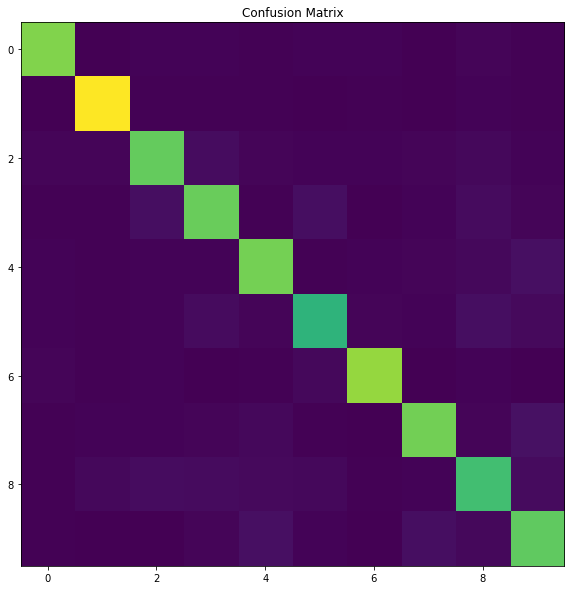

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(tx,ty)
print("Testing Accuracy Score: ",clf.score(tesx,tesy))
from sklearn.metrics import classification_report
pre = clf.predict(tesx)
print("\n\nClassification Report")
print(classification_report(tesy,pre))
print("\n\nConfusion metrics")
print(confusion_matrix(tesy,pre))
matrix = confusion_matrix(tesy,pre)

figurePlot = plt.figure(figsize=(10,10))
axis = figurePlot.add_subplot(111)
axis.set_title('Confusion Matrix')
plt.imshow(matrix)
plt.show()